In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append("/scratch/tc427/lucy/consensus/code")

In [4]:
import numpy as np
import consensus

In [5]:
prog = "mcfold"
cut = 5
seq_cl1 = "GGAAGAGGAAAGAAGTGCAGAGCCAGTATTCGGGTACATCCAGACGTGCCTCTCTTTTGGATTTCTTGTGCTCGCGAGGCAATCA"

In [17]:
def cutmap(seq, cut, prog="mcfold"):
    cpred = consensus.Consensus(prog)
    # store the energy of the lowest strcture for each cut
    cutmap=np.zeros((cut, cut), dtype=float)
    # store the 2D structure in here, in dot-bracket format
    cutstruct=np.zeros((cut, cut), dtype="U"+str(len(seq)))
    for i in range(cut):
        for ji in range(cut):
            j = len(seq)-ji
            #print(seq[i:j])
            p = cpred.run(seq[i:j], outdir=None, rmdir=True)
            cutmap[i,ji] = p.ix[0,1]
            cutstruct[i,ji] = p.ix[0,0]
    return cutmap, cutstruct

In [39]:
cl1_maps = cutmap(seq_cl1, 30, 'RNAfold')

In [33]:
def normalise_len(mat):
    # create a matrix of the sequence lengths, to be used as a normalisation factor
    l = np.zeros(mat.shape)
    for i in range(l.shape[0]):
        for j in range(l.shape[1]):
            l[i,j] = len(mat[i,j])
    return l

In [ ]:
with sns.axes_style("white"):
    fig1, axarr = plt.subplots(len(fprogs))
    for ax, folds in zip(axarr, folds_cut30):
        ax.imshow(folds, cmap='viridis', interpolation='none')

In [34]:
def showmaps(Emat, Smat):
    l = normalise_len(Smat)
    with sns.axes_style("white"):
        fig1, (ax1, ax2) = plt.subplots(ncols=2)
        ax1.imshow(Emat, cmap='terrain', interpolation='none')
        ax2.imshow(Emat/l, cmap='terrain', interpolation='none')

In [37]:
seq_cl2 = "GGAAGAGGAAAGAAGUGCAGAGCGAUACUCGGGUACAUUCGAUUAAGUCCUCAGAAUCGAAUUUCUUGUGCUCGCGAGGCAAUCA"
cl2_maps = cutmap(seq_cl2, 30, 'RNAfold')

In [38]:
seq_cl3 = "GGAAGAGGAAAGAAGTGCAGATTCCCAAACAATAACGCATCACATGAAGTTCCATCCTCGATTTCTTGTGCTCGCGAGGCAATCA"
cl3_maps = cutmap(seq_cl3, 30, 'RNAfold')

<IPython.core.display.Javascript object>


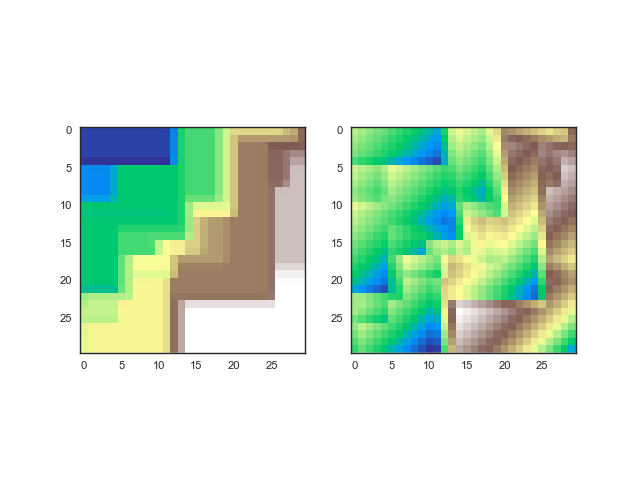

<IPython.core.display.Javascript object>


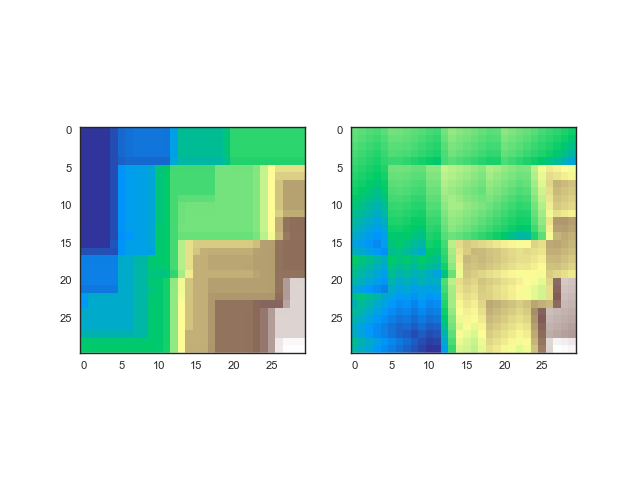

<IPython.core.display.Javascript object>


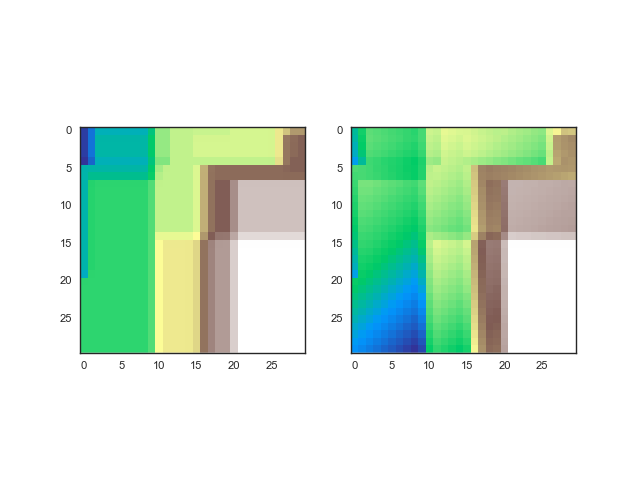

In [41]:
showmaps(*cl1_maps)
showmaps(*cl2_maps)
showmaps(*cl3_maps)

In [21]:
fprogs = ["RNAfold", "Vfold"]
folds_cut30 = list()
for fp in fprogs:
    print(fp)
    folds_cut30.append(cutmap(seq_cl1, 30, fp))

RNAfold
Vfold


KeyboardInterrupt: 